In [22]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggpubr)
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
source("../../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250)

# Added Value when we add components knowledge to chromatin splicing factors

In [44]:
SVM <- read.table("../Prognosis_results/SVM.csv",sep=',',header=T)

In [122]:
### Useful function for Comparison

comparison <-function(models = c("eln","comp"), remove_RFX_=T ){

    df_comparison <- cbind(read.table(paste(paste("../Prognosis_results/",models[1],sep=""),".tsv",sep="")),SVM=SVM[,models[1]])
    df_comparison$model <- ifelse(models[1]=="eln","ELN Recommendation 2017",
                         ifelse(models[1]=="comp","Components",models[1]))
    for (mod in models[-1]){
        tmp <- cbind(read.table(paste(paste("../Prognosis_results/",mod,sep=""),".tsv",sep="")),SVM=SVM[,mod])
        tmp$model <- ifelse(mod=="eln","ELN Recommendation 2017",
                         ifelse(mod=="comp","Components",mod))
        df_comparison <- rbind(df_comparison,tmp)
    }
    df_comparison <- melt(df_comparison,id='model')
    if (remove_RFX_){df_comparison <- df_comparison[df_comparison$variable!= "RFX_",]}
    df_comparison $title <- "Comparison"
    
    
    
    
    set_notebook_plot_size(25,8)
    p1 <- ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
    theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
         axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
    ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)
    
    
    p2 <- ggplot(df_comparison, aes(x=reorder(model,-value,FUN=median),y=value))+
    geom_boxplot(aes(fill =model), notch=F)+
    theme(strip.text = element_text(size=30),legend.position="none",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=15),axis.text.y = element_text(size = 15),
             axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
    #theme(legend.position="top",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8))+
    xlab("")+ylab("C-Index")
    return(list(p1,p2))
}

# I) Comparisons for ELN 

## 1) Added Value of genetical,cytogenetical and Components on ELN

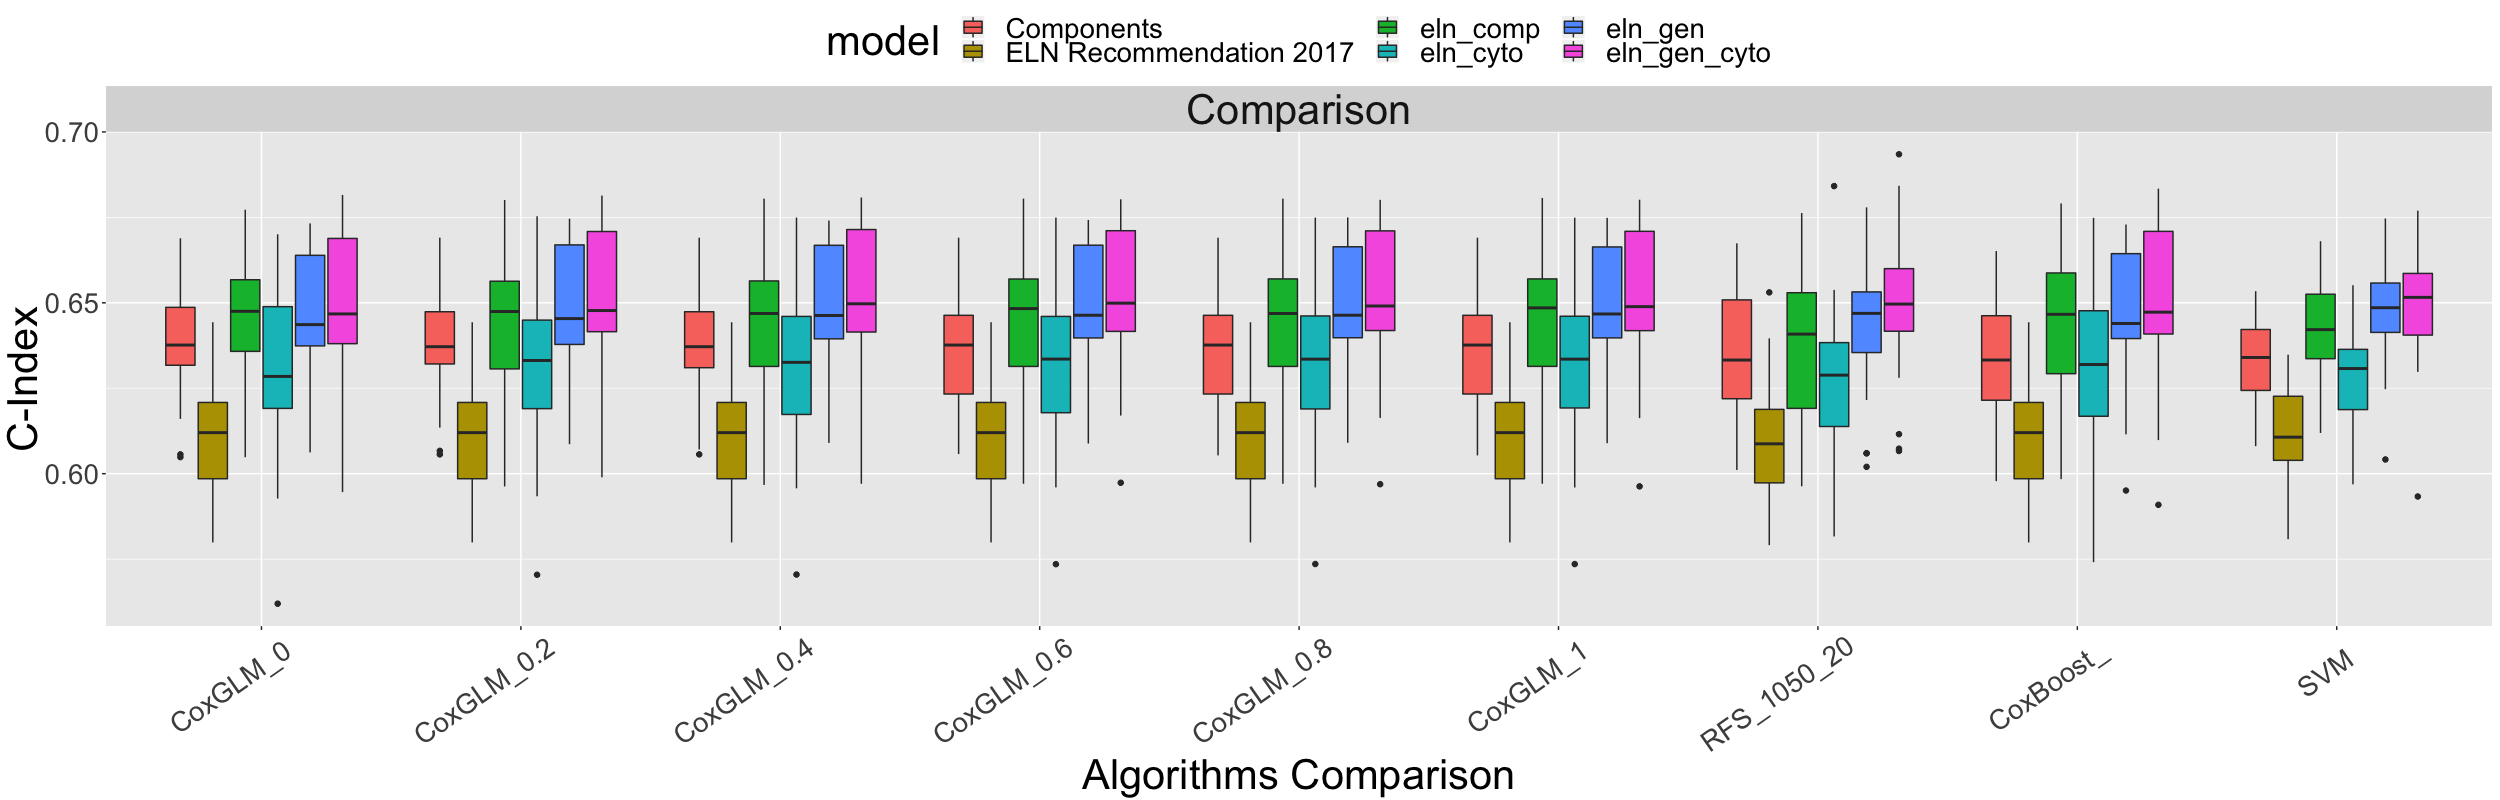

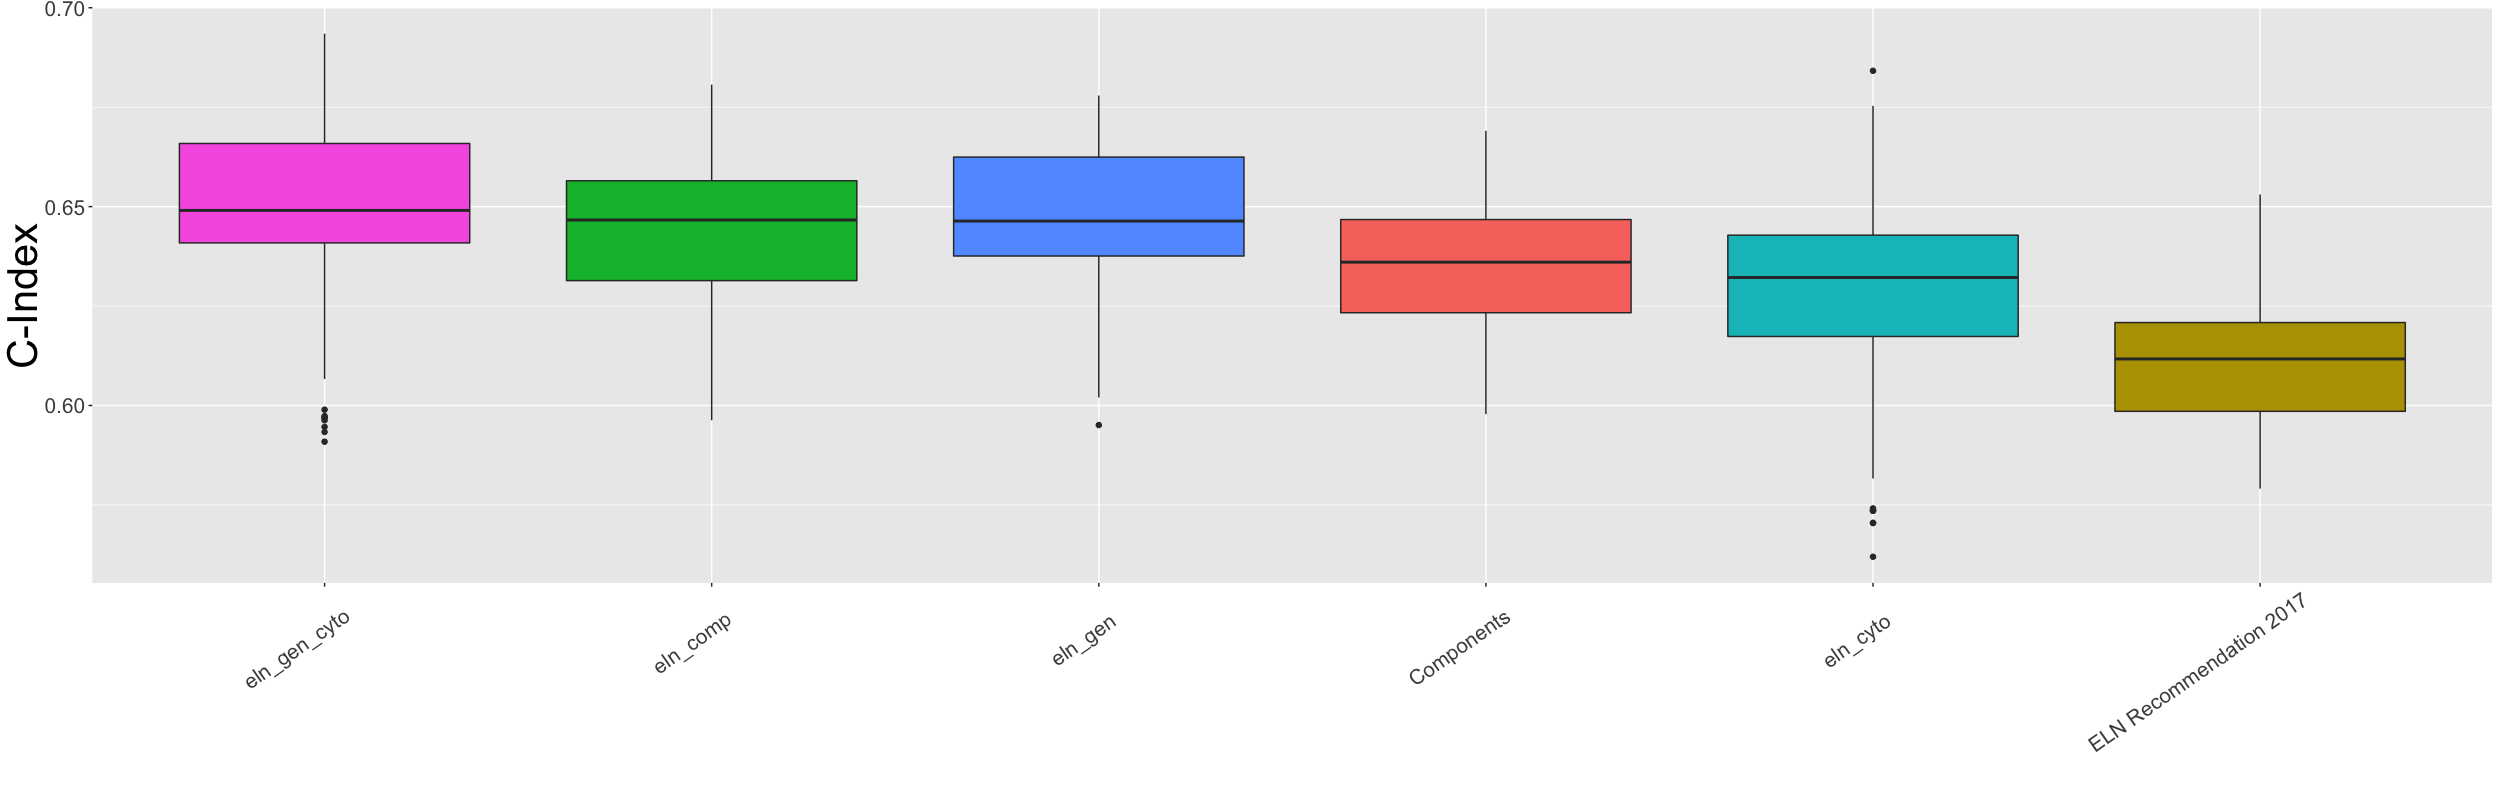

In [124]:
comparison(c("eln","eln_comp","eln_gen","eln_cyto","eln_gen_cyto","comp"))[[1]]
comparison(c("eln","eln_comp","eln_gen","eln_cyto","eln_gen_cyto","comp"))[[2]]

### Huge benefit of adding components to eln! But adding gen and cyto does not bring much to eln compared to components.
### Let's show that Components are capturing cyto and genetical information by comparing the models :
In components, it means that we still miss a bit of genetical info but not much compare to ELN and we already capture all cyto info

#### Motivation to refine ELN with Components : ELN + Components capture more information than GEN + CYTO

ELN is not cvapturing all cyto info (graph above)
(Components are capturing all cyto info graph below)

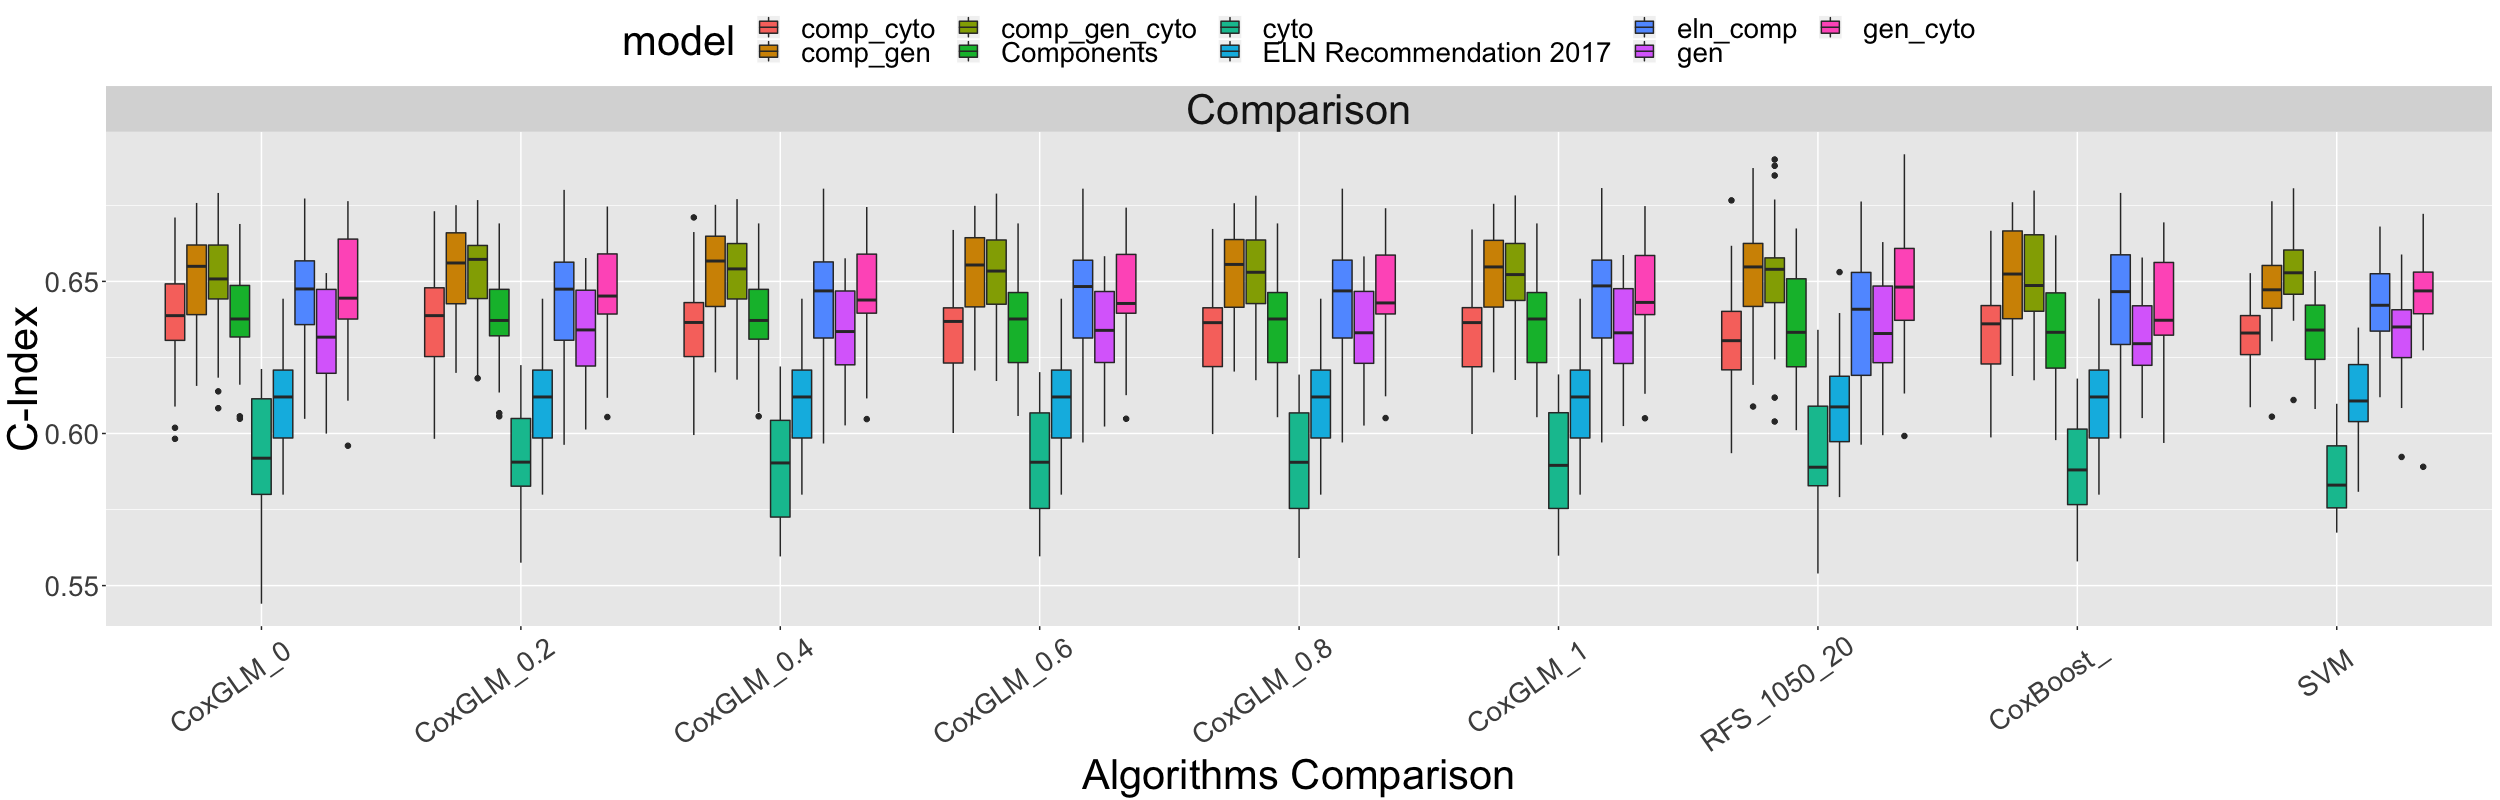

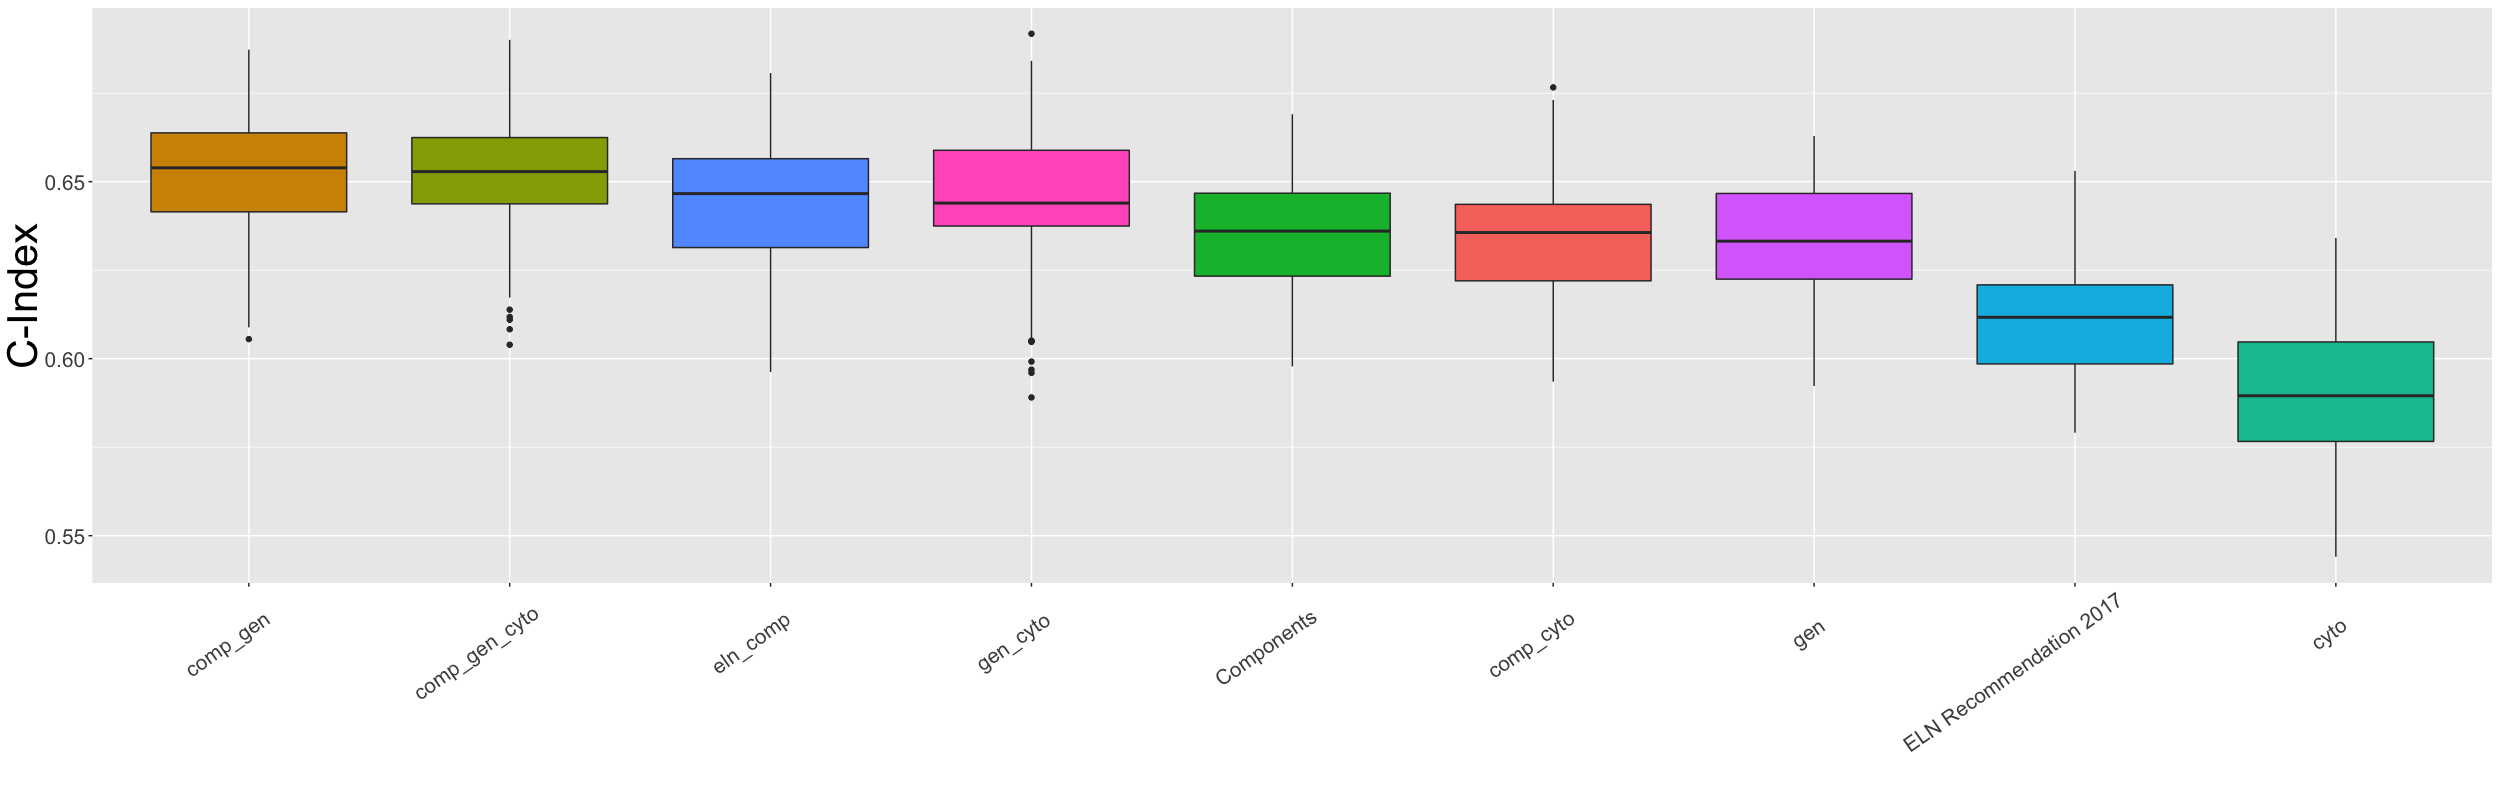

In [127]:
comparison(c("comp","eln","gen","cyto","gen_cyto","comp_gen","comp_cyto","comp_gen_cyto","eln_comp"))[[1]]
comparison(c("comp","eln","gen","cyto","gen_cyto","comp_gen","comp_cyto","comp_gen_cyto","eln_comp"))[[2]]

## 2) Added Value of clinical and demographical features to ELN

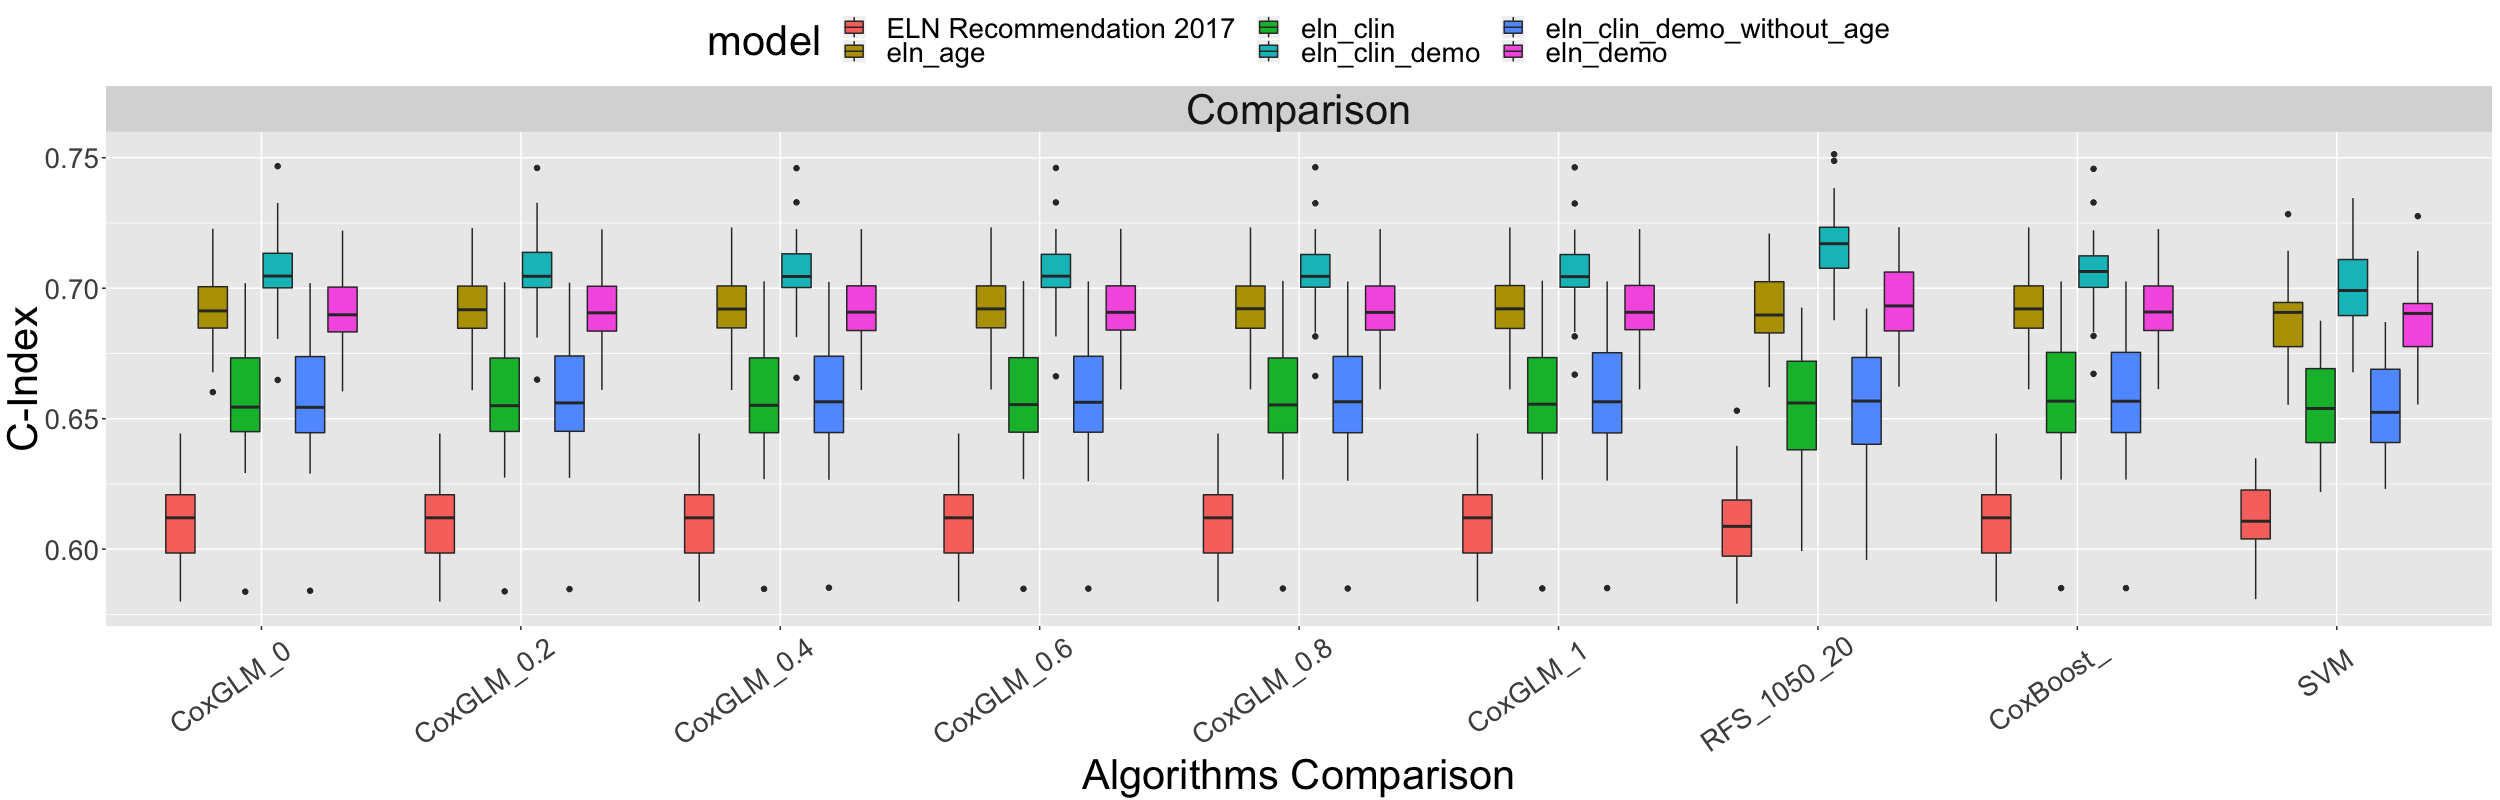

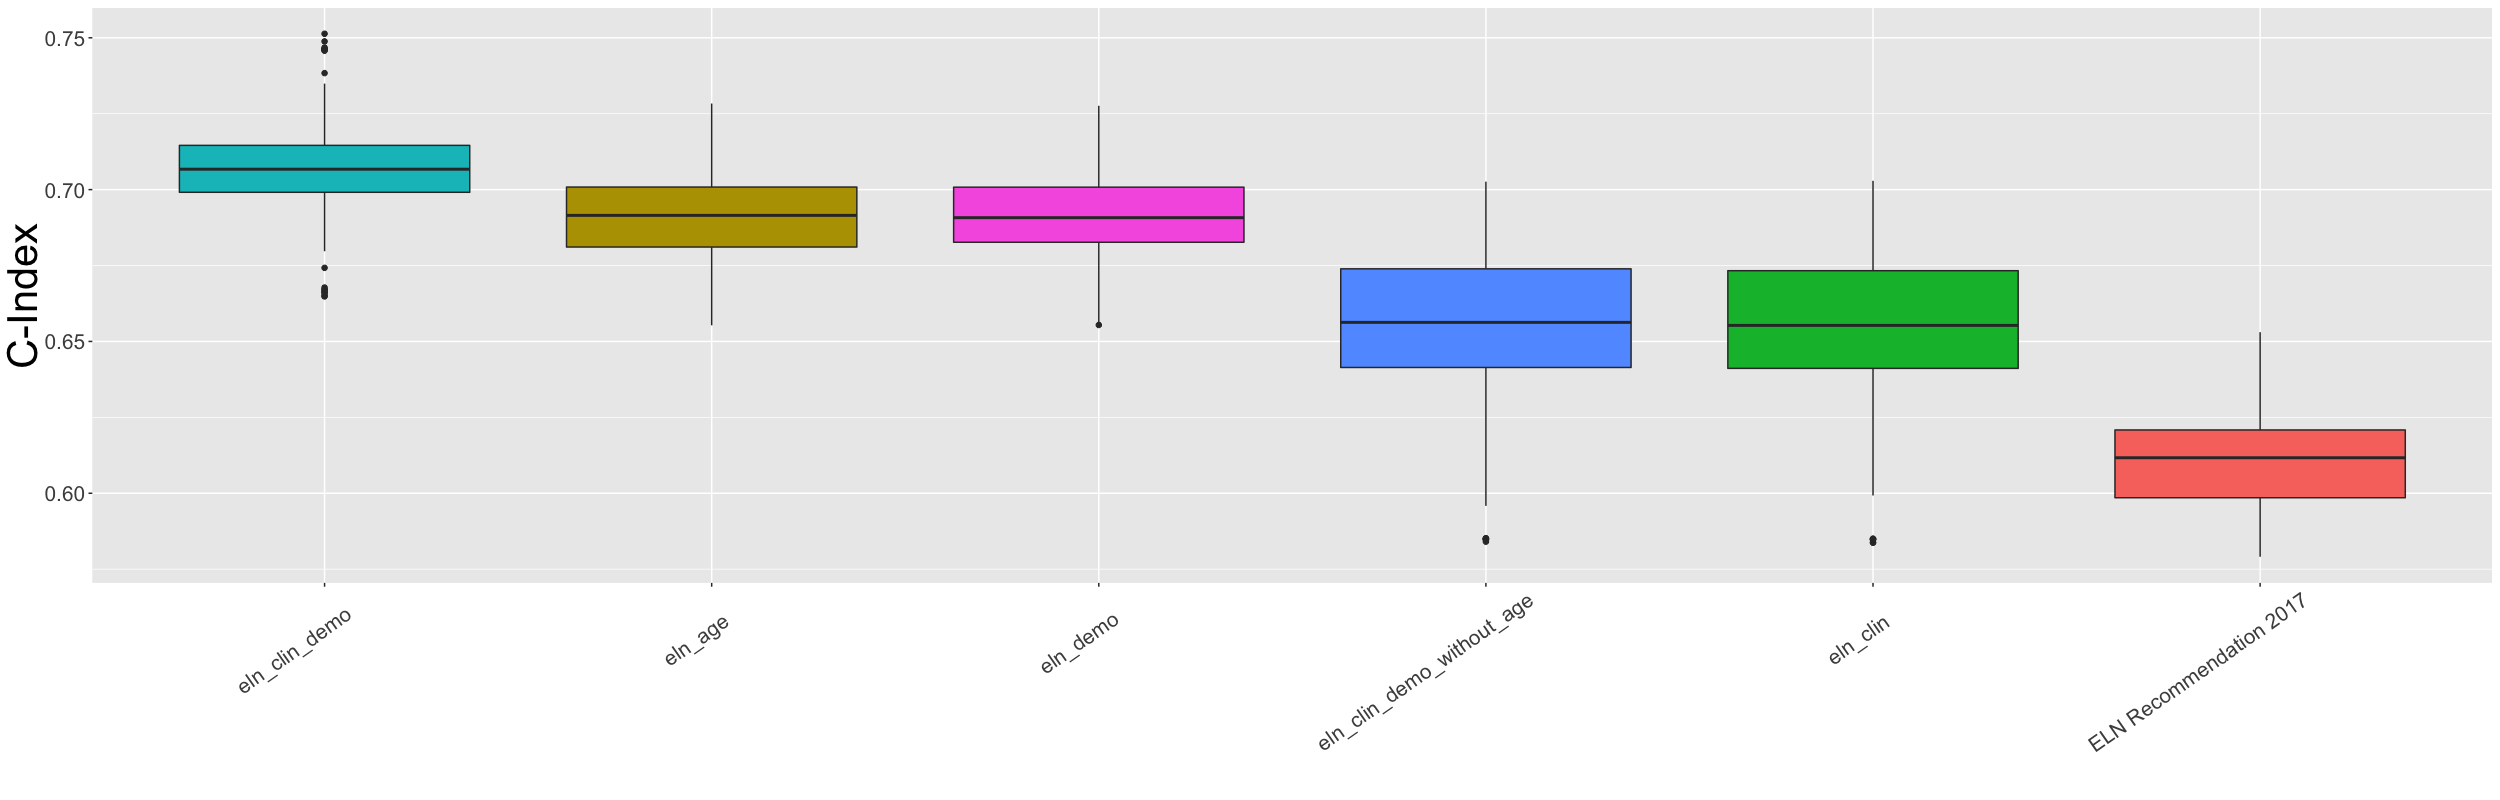

In [126]:
comparison(c("eln","eln_age","eln_demo","eln_clin","eln_clin_demo","eln_clin_demo_without_age"))[[1]]
comparison(c("eln","eln_age","eln_demo","eln_clin","eln_clin_demo","eln_clin_demo_without_age"))[[2]]

# II) ADDED VALUE OF ELN, GENES AND CYTO TO ELN

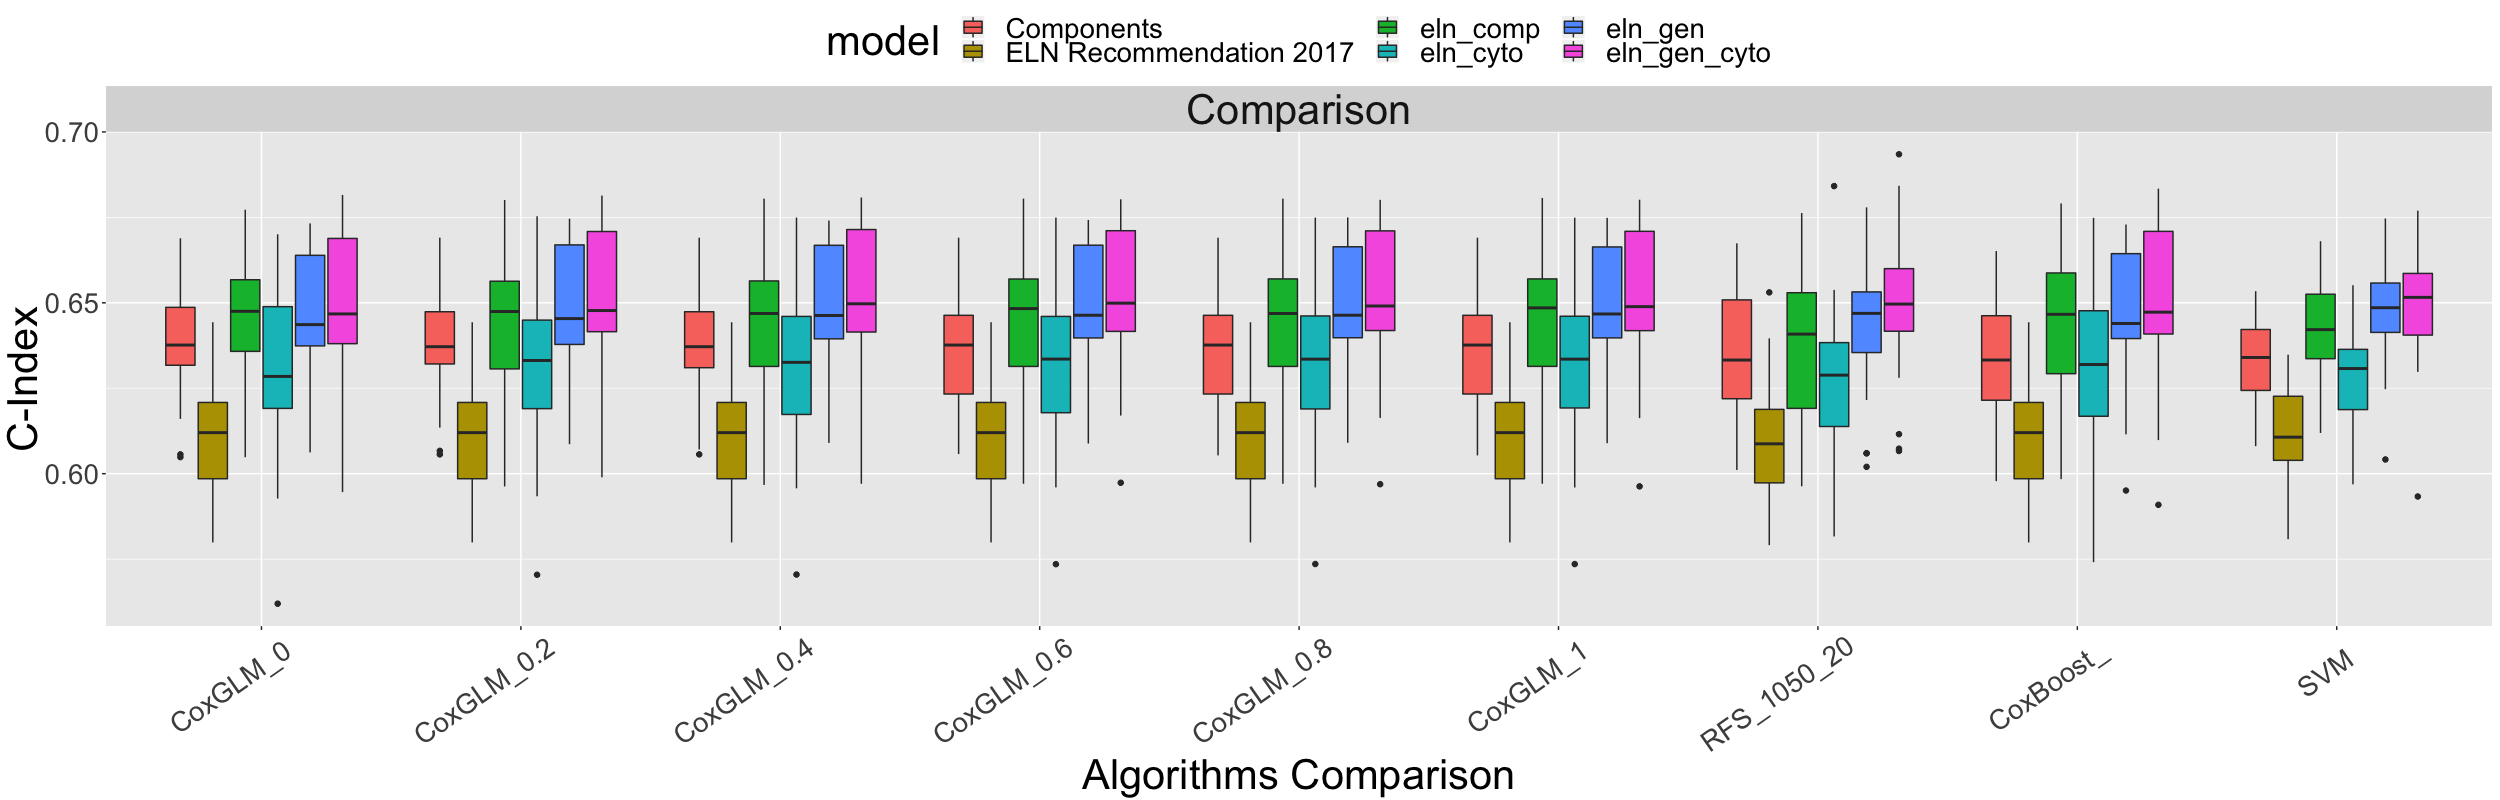

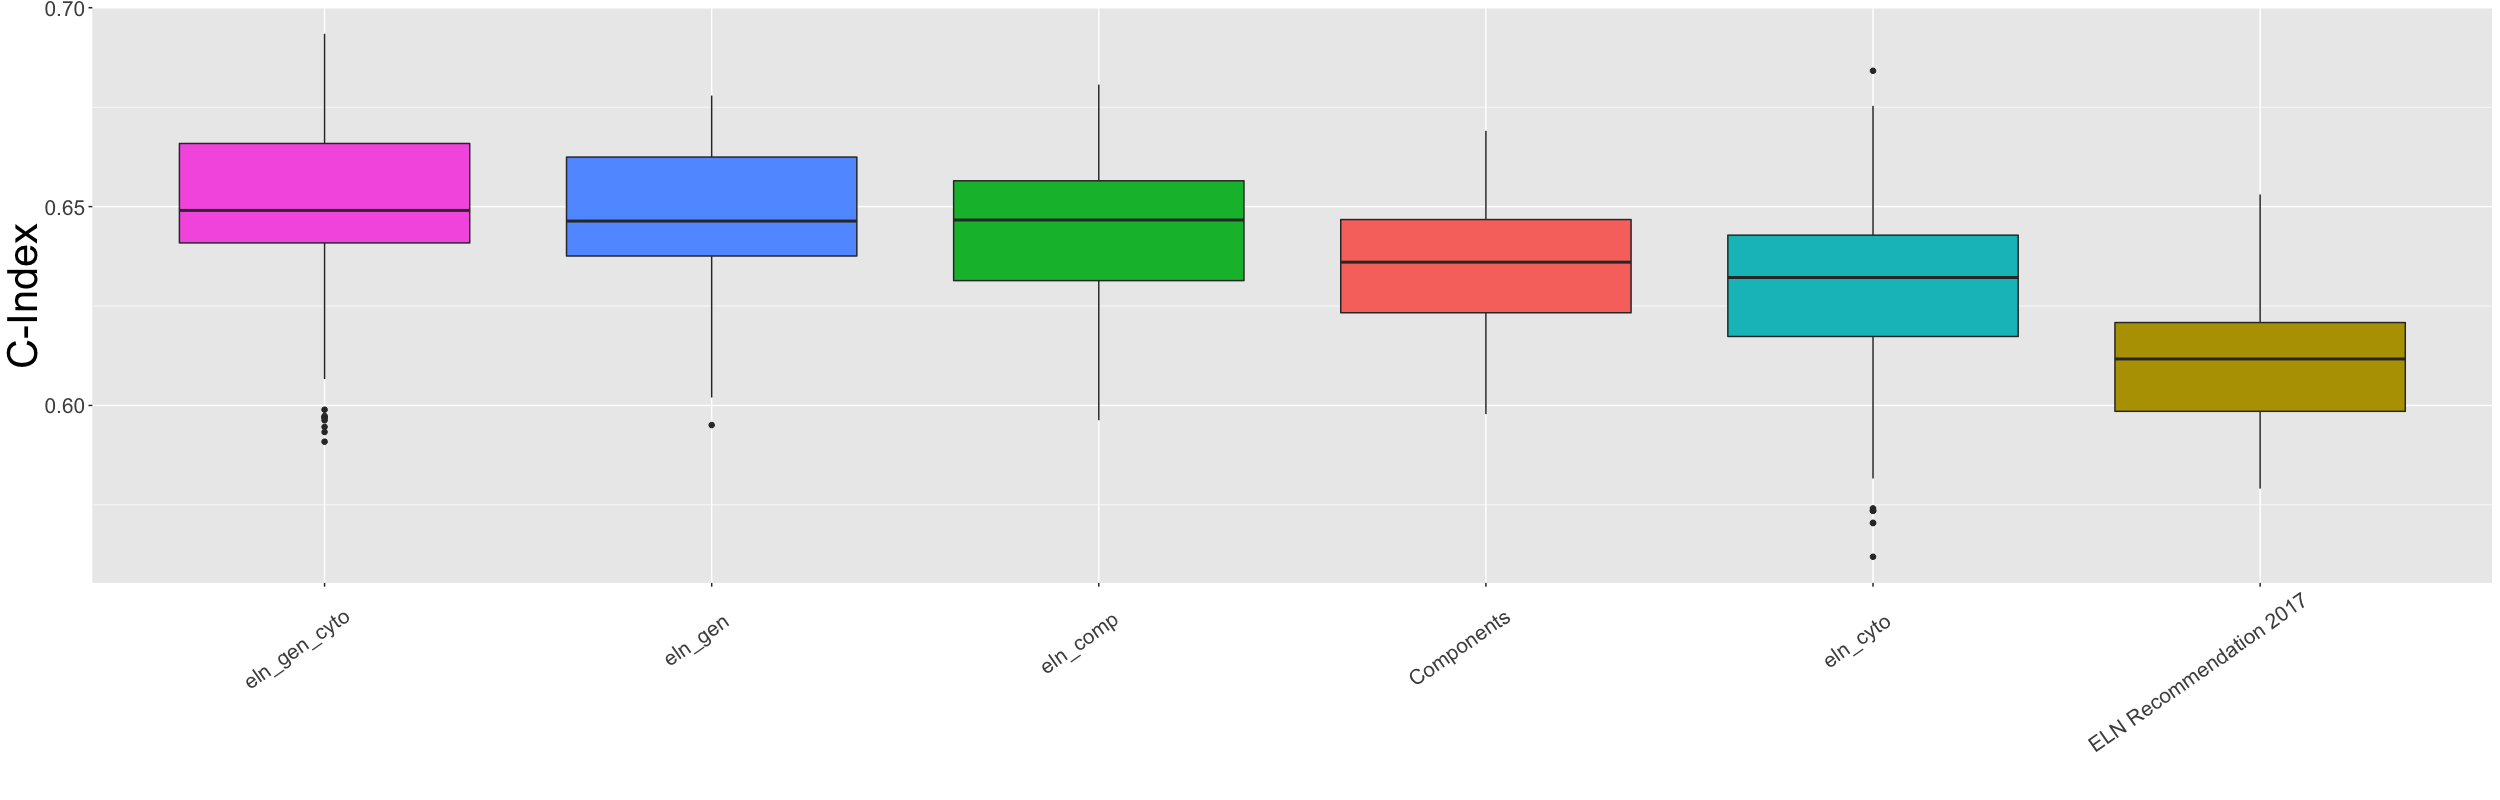

In [104]:
comparison("eln","eln_comp","eln_gen","eln_cyto","eln_gen_cyto","comp",num=6)[[1]]
comparison("eln","eln_comp","eln_gen","eln_cyto","eln_gen_cyto","comp",num=6)[[2]]

# More insights with cytogenetical data

[1] 0.6282264

[1] 0.6248873

[1] 0.6101422

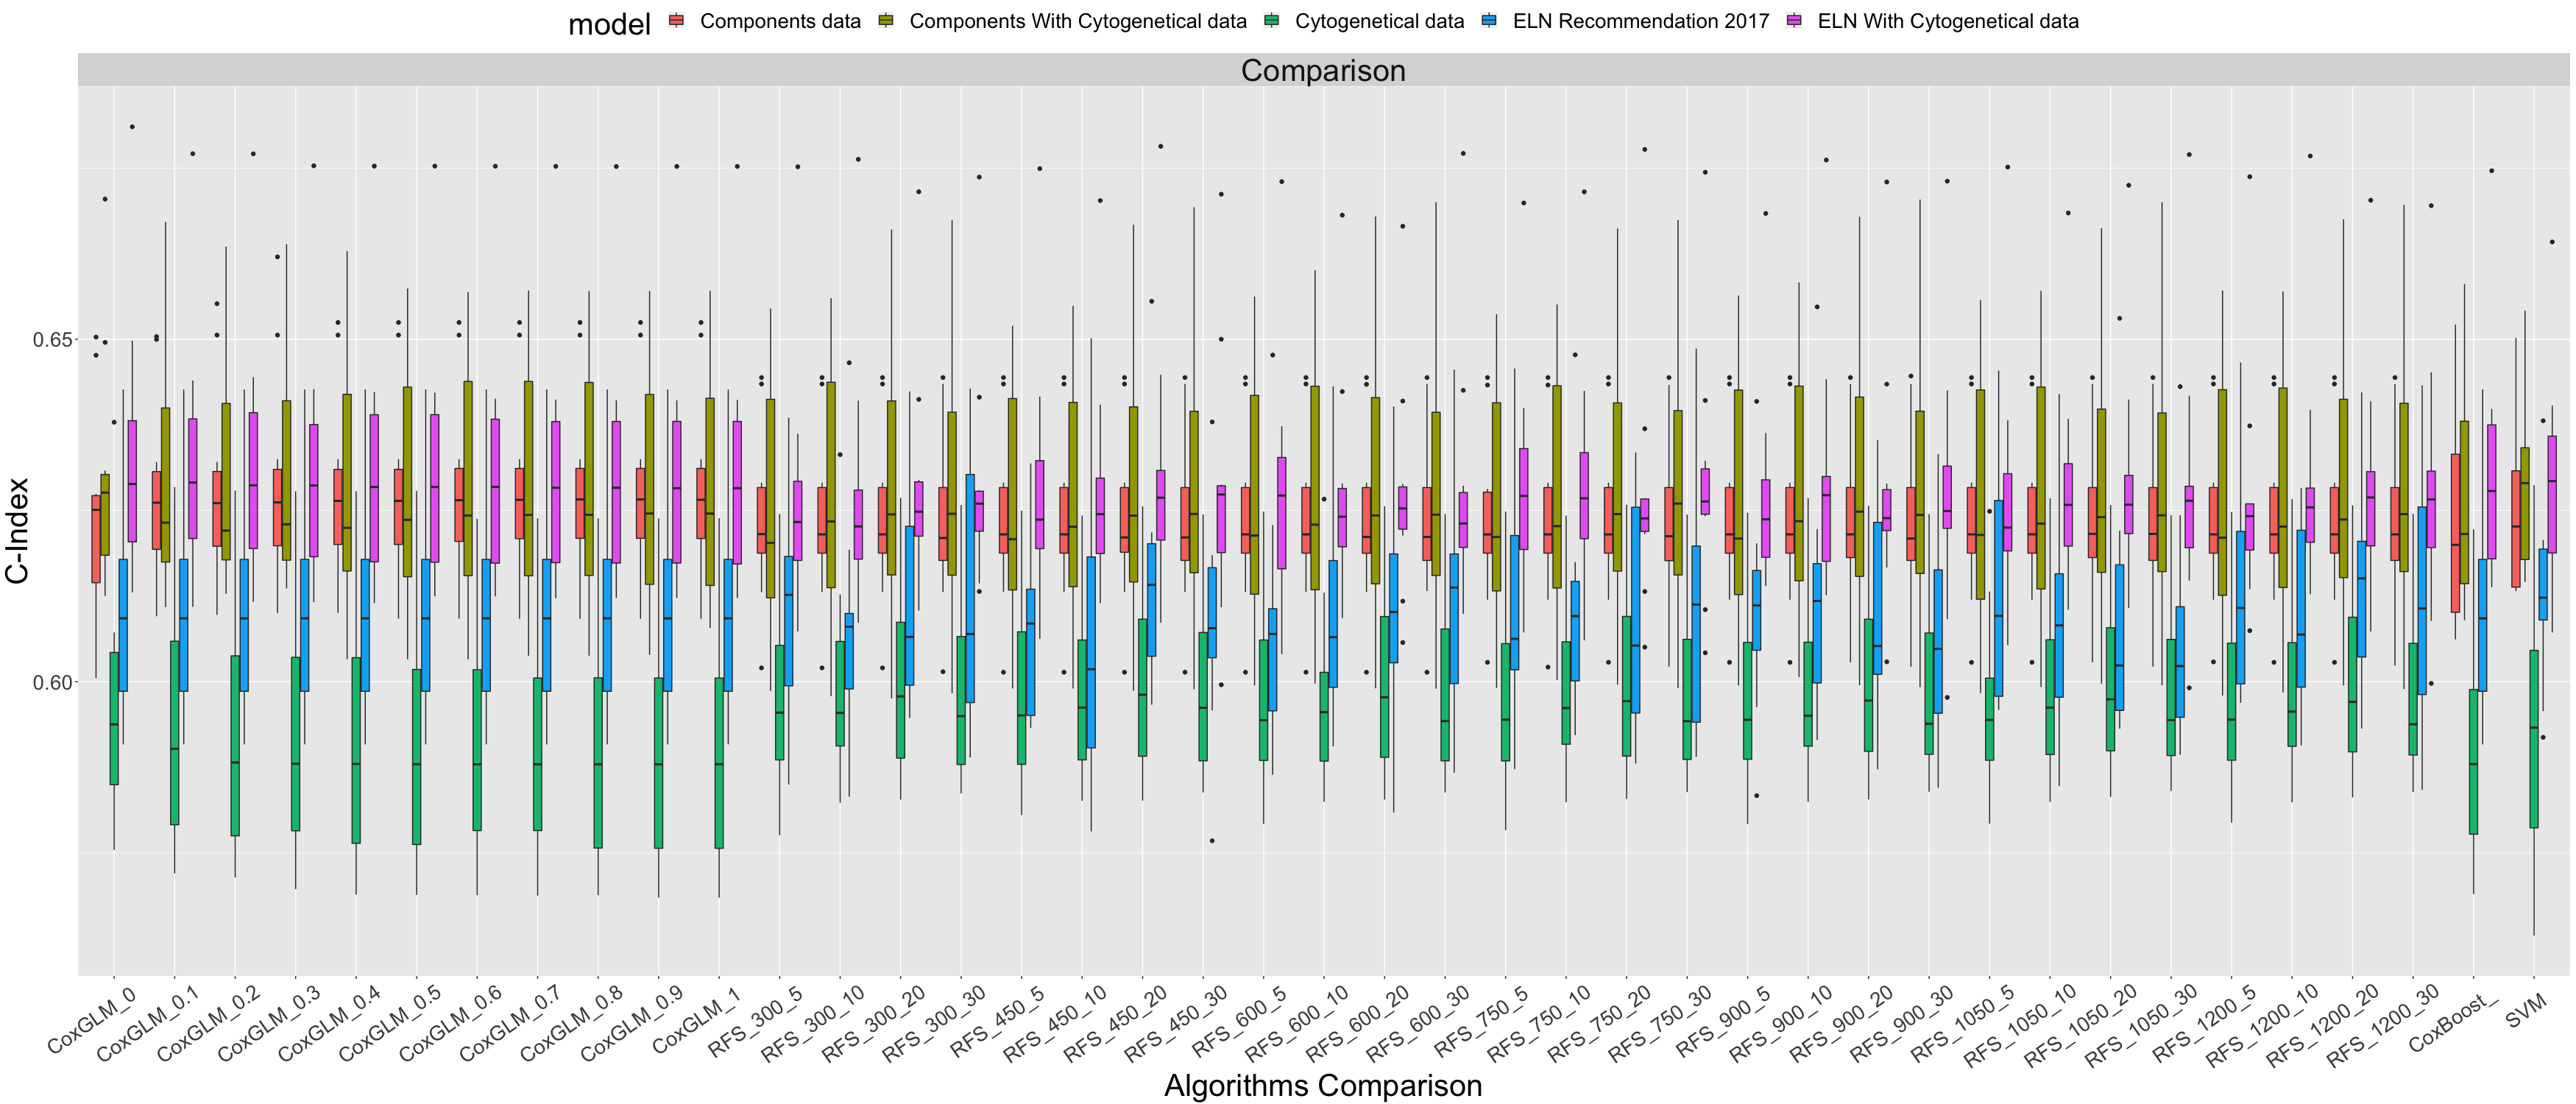

In [93]:
cyto_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/cyto_comp.tsv"),SVM=SVM_final$cyto_comp)
cyto_comp$RFX_ <- NULL
cyto_comp $model <- "Components With Cytogenetical data"

comp <- cbind(read.table("../InitialPrognosis/final_prognosis/comp.tsv")[1:10,],SVM=SVM_final$comp[1:10])
comp$RFX_ <- NULL
comp$model <- "Components data"

eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln.tsv")[1:10,],SVM=SVM$eln[1:10])
eln$RFX_ <- NULL
eln$model <- "ELN Recommendation 2017"

cyto_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_cyto.tsv")[1:10,],SVM=SVM$eln_cyto[1:10])
cyto_eln$RFX_ <- NULL
cyto_eln$model <- "ELN With Cytogenetical data"

cyto<- cbind(read.table("../InitialPrognosis/final_prognosis/cyto.tsv")[1:10,],SVM=SVM_final$cyto[1:10])
cyto$RFX_ <- NULL
cyto$model <- "Cytogenetical data"

df_comparison <- rbind(cyto_comp,comp)
df_comparison <- rbind(df_comparison,eln)
df_comparison <- rbind(df_comparison,cyto_eln)
df_comparison <- rbind(df_comparison,cyto)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(35,15)
mean(as.matrix(cyto_comp[,-length(colnames(cyto_comp))]))
mean(as.matrix(comp[,-length(colnames(comp))]))
mean(as.matrix(eln[,-length(colnames(eln))]))

ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

## INTERESTING :
#### Adding Cytogenetical data to Components does not improve the C-I compared to when we add cytogenetical data to ELN. Also, there is clearly a motivation to add other features to cytogenetical data
Let's check that for genetical data:

# More insights with genetical data

0.6532671 0.6532671

[1] 0.6248873

[1] 0.6101422

[1] 0.6367702

[1] 0.6447529

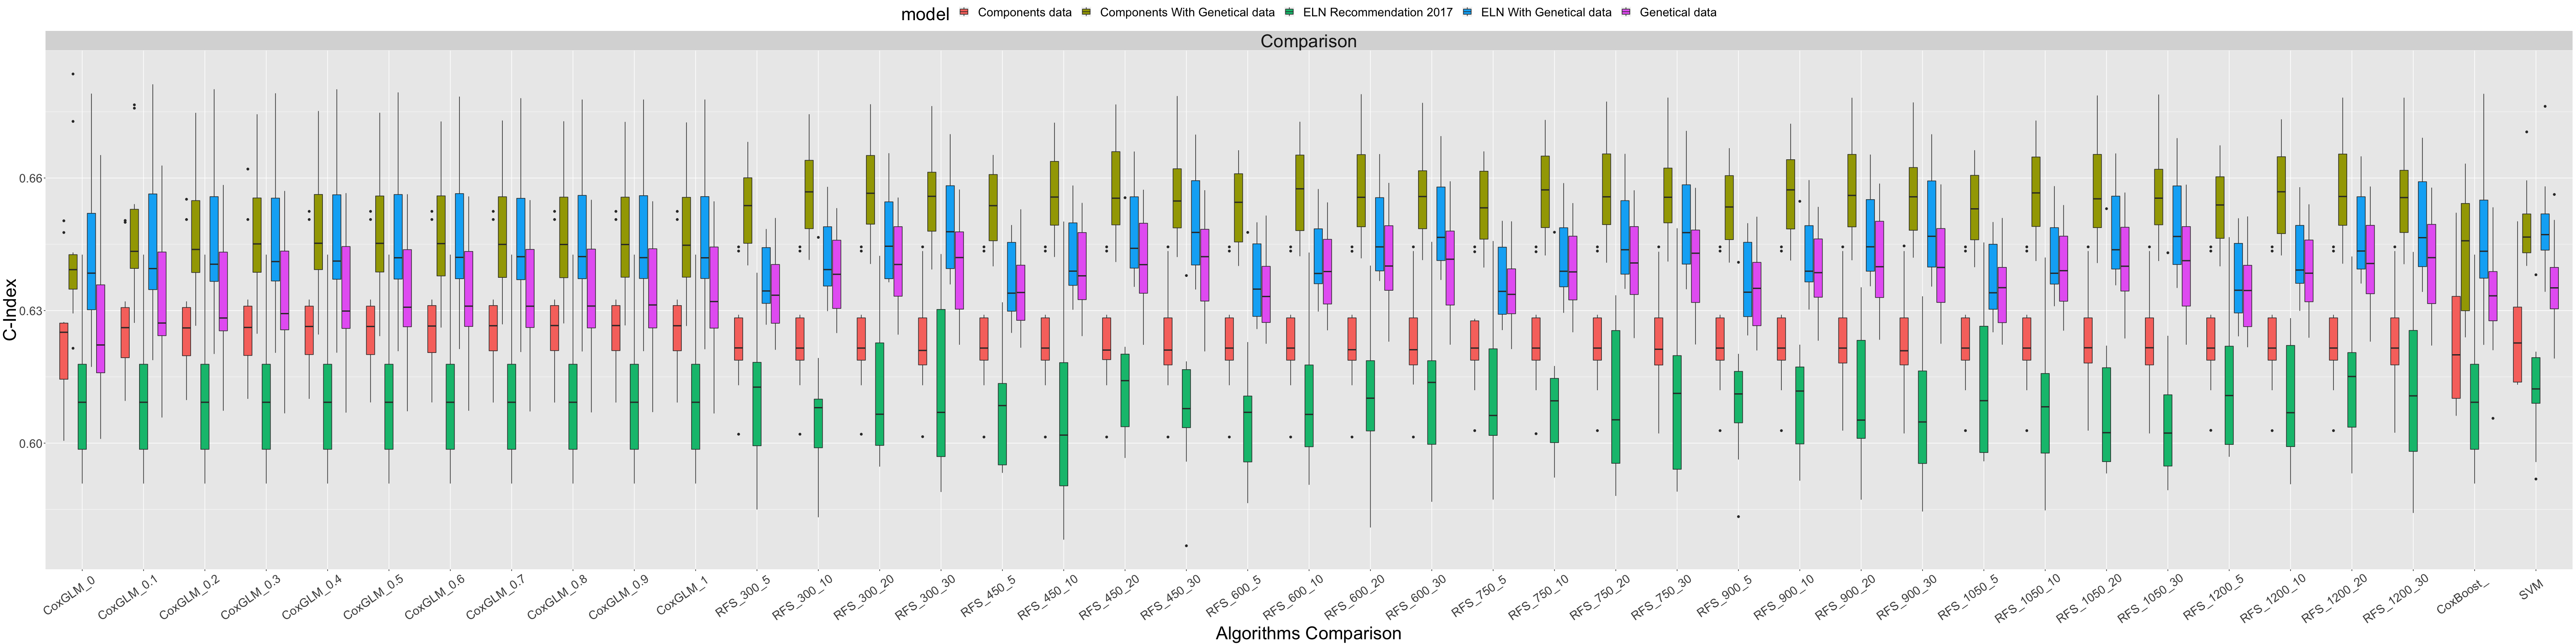

In [99]:
gen_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/gen_comp.tsv"),SVM=SVM_final$gen_comp)
gen_comp$RFX_ <- NULL
gen_comp $model <- "Components With Genetical data"

comp <- cbind(read.table("../InitialPrognosis/final_prognosis/comp.tsv")[1:10,],SVM=SVM_final$comp[1:10])
comp$RFX_ <- NULL
comp$model <- "Components data"

eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln.tsv")[1:10,],SVM=SVM$eln[1:10])
eln$RFX_ <- NULL
eln$model <- "ELN Recommendation 2017"

gen_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_gen.tsv")[1:10,],SVM=SVM$eln_gen[1:10])
gen_eln$RFX_ <- NULL
gen_eln$model <- "ELN With Genetical data"

gen<- cbind(read.table("../InitialPrognosis/final_prognosis/gen.tsv")[1:10,],SVM=SVM_final$gen[1:10])
gen$RFX_ <- NULL
gen$model <- "Genetical data"

df_comparison <- rbind(gen_comp,comp)
df_comparison <- rbind(df_comparison,eln)
df_comparison <- rbind(df_comparison,gen_eln)
df_comparison <- rbind(df_comparison,gen)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(60,15)
mean(as.matrix(comp[,-length(colnames(comp))]))
mean(as.matrix(eln[,-length(colnames(eln))]))
mean(as.matrix(gen[,-length(colnames(gen))]))
mean(as.matrix(gen_eln[,-length(colnames(gen_eln))]))
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)